Имеется архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.



Описание данных

|Признак|Описание|
|--:|:--|
|airports_nearest | расстояние до ближайшего аэропорта в метрах (м)|
|balcony | число балконов|
|ceiling_height | высота потолков (м)|
|cityCenters_nearest | расстояние до центра города (м)|
|days_exposition | сколько дней было размещено объявление (от публикации до снятия)|
|first_day_exposition | дата публикации|
|floor | этаж|
|floors_total | всего этажей в доме|
|is_apartment | апартаменты (булев тип)|
|kitchen_area | площадь кухни в квадратных метрах (м²)|
|last_price | цена на момент снятия с публикации|
|living_area | жилая площадь в квадратных метрах(м²)|
|locality_name | название населённого пункта|
|open_plan | свободная планировка (булев тип)|
|parks_around3000 | число парков в радиусе 3 км|
|parks_nearest | расстояние до ближайшего парка (м)|
|ponds_around3000 | число водоёмов в радиусе 3 км|
|ponds_nearest | расстояние до ближайшего водоёма (м)|
|rooms | число комнат|
|studio | квартира-студия (булев тип)|
|total_area | площадь квартиры в квадратных метрах (м²)|
|total_images | число фотографий квартиры в объявлении|

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('spb.csv',
                 delimiter = '\t')              

## Предобработка

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.rename(columns = {'floor' : 'floor_home',
                     'citycenters_nearest' : 'city_centers_nearest'}, 
          inplace = True)

In [7]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor_home',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor_home            23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor_home              0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Видим в датасете колонки, в которых необходимо поменять тип данных:
  first_day_exposition и is_apartment.
  Видим колонки с пропущенными значениями, с которыми мы будем работать в дальнейшем

Заменим некоторые пропуски:

In [10]:
df.is_apartment.fillna(False, inplace=True)

In [11]:
df = df.dropna(subset=['locality_name'])

In [12]:
df = df.dropna(subset=['floors_total'])

Удалили все пропущенные значения колонок с названием населенного пункта и этажности, т.к. их колличество незначительно (0,2% и 0,36% соответственно), а восстановить невозможно

Заменим типы данных на соответствующие:

In [13]:
df = df.astype({'first_day_exposition' : 'datetime64',       
                'is_apartment' : bool},  
               errors = 'ignore')

Заменяем пропущенные значения признака балконы на 0:

In [14]:
df['balcony'] = df['balcony'].replace(np.nan, 0)

In [15]:
df.dtypes 

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor_home                       int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [16]:
df.duplicated().sum()

0

Проверили наличие дублей

In [17]:
percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99] 
df.describe(percentiles = percentiles) 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor_home,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
1%,0.000000,1.000000e+06,25.319200,1.000000,2.500000,2.000000,13.000000,1.000000,5.000000,0.000000,9516.600000,1326.260000,0.000000,24.000000,0.000000,35.000000,4.000000
5%,1.000000,1.860000e+06,31.000000,1.000000,2.500000,4.000000,15.200000,1.000000,5.500000,0.000000,11583.000000,3541.000000,0.000000,96.000000,0.000000,92.000000,9.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
90%,19.000000,1.090000e+07,93.400000,3.000000,3.060000,22.000000,55.000000,13.000000,15.890000,2.000000,47059.000000,26146.700000,2.000000,762.000000,2.000000,897.000000,459.700000


Ввели доп перцентили, смотрим на описательные статистики, выявляем вероятные аномалии/ошибочные значения, можем оценить какие данные будем резать 
(например: высота потолков в 100м)

In [18]:
df.select_dtypes(['bool', 'object']) 

,is_apartment,studio,open_plan,locality_name
0,False,False,False,Санкт-Петербург
1,False,False,False,посёлок Шушары
2,False,False,False,Санкт-Петербург
3,False,False,False,Санкт-Петербург
4,False,False,False,Санкт-Петербург
...,...,...,...,...
23694,False,False,False,Санкт-Петербург
23695,False,False,False,Тосно
23696,False,False,False,село Рождествено
23697,False,False,False,Санкт-Петербург


In [19]:
anomals_columns = ['last_price', 'total_area', 
                   'rooms', 'ceiling_height', 
                   'living_area', 'kitchen_area']

C:\Temp\ipykernel_20332\940313171.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[col]);
C:\Temp\ipykernel_20332\940313171.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[col]);
C:\Temp\ipykernel_20332\940313171.py:7: UserWarning: 

`distplot` is a deprecated function and

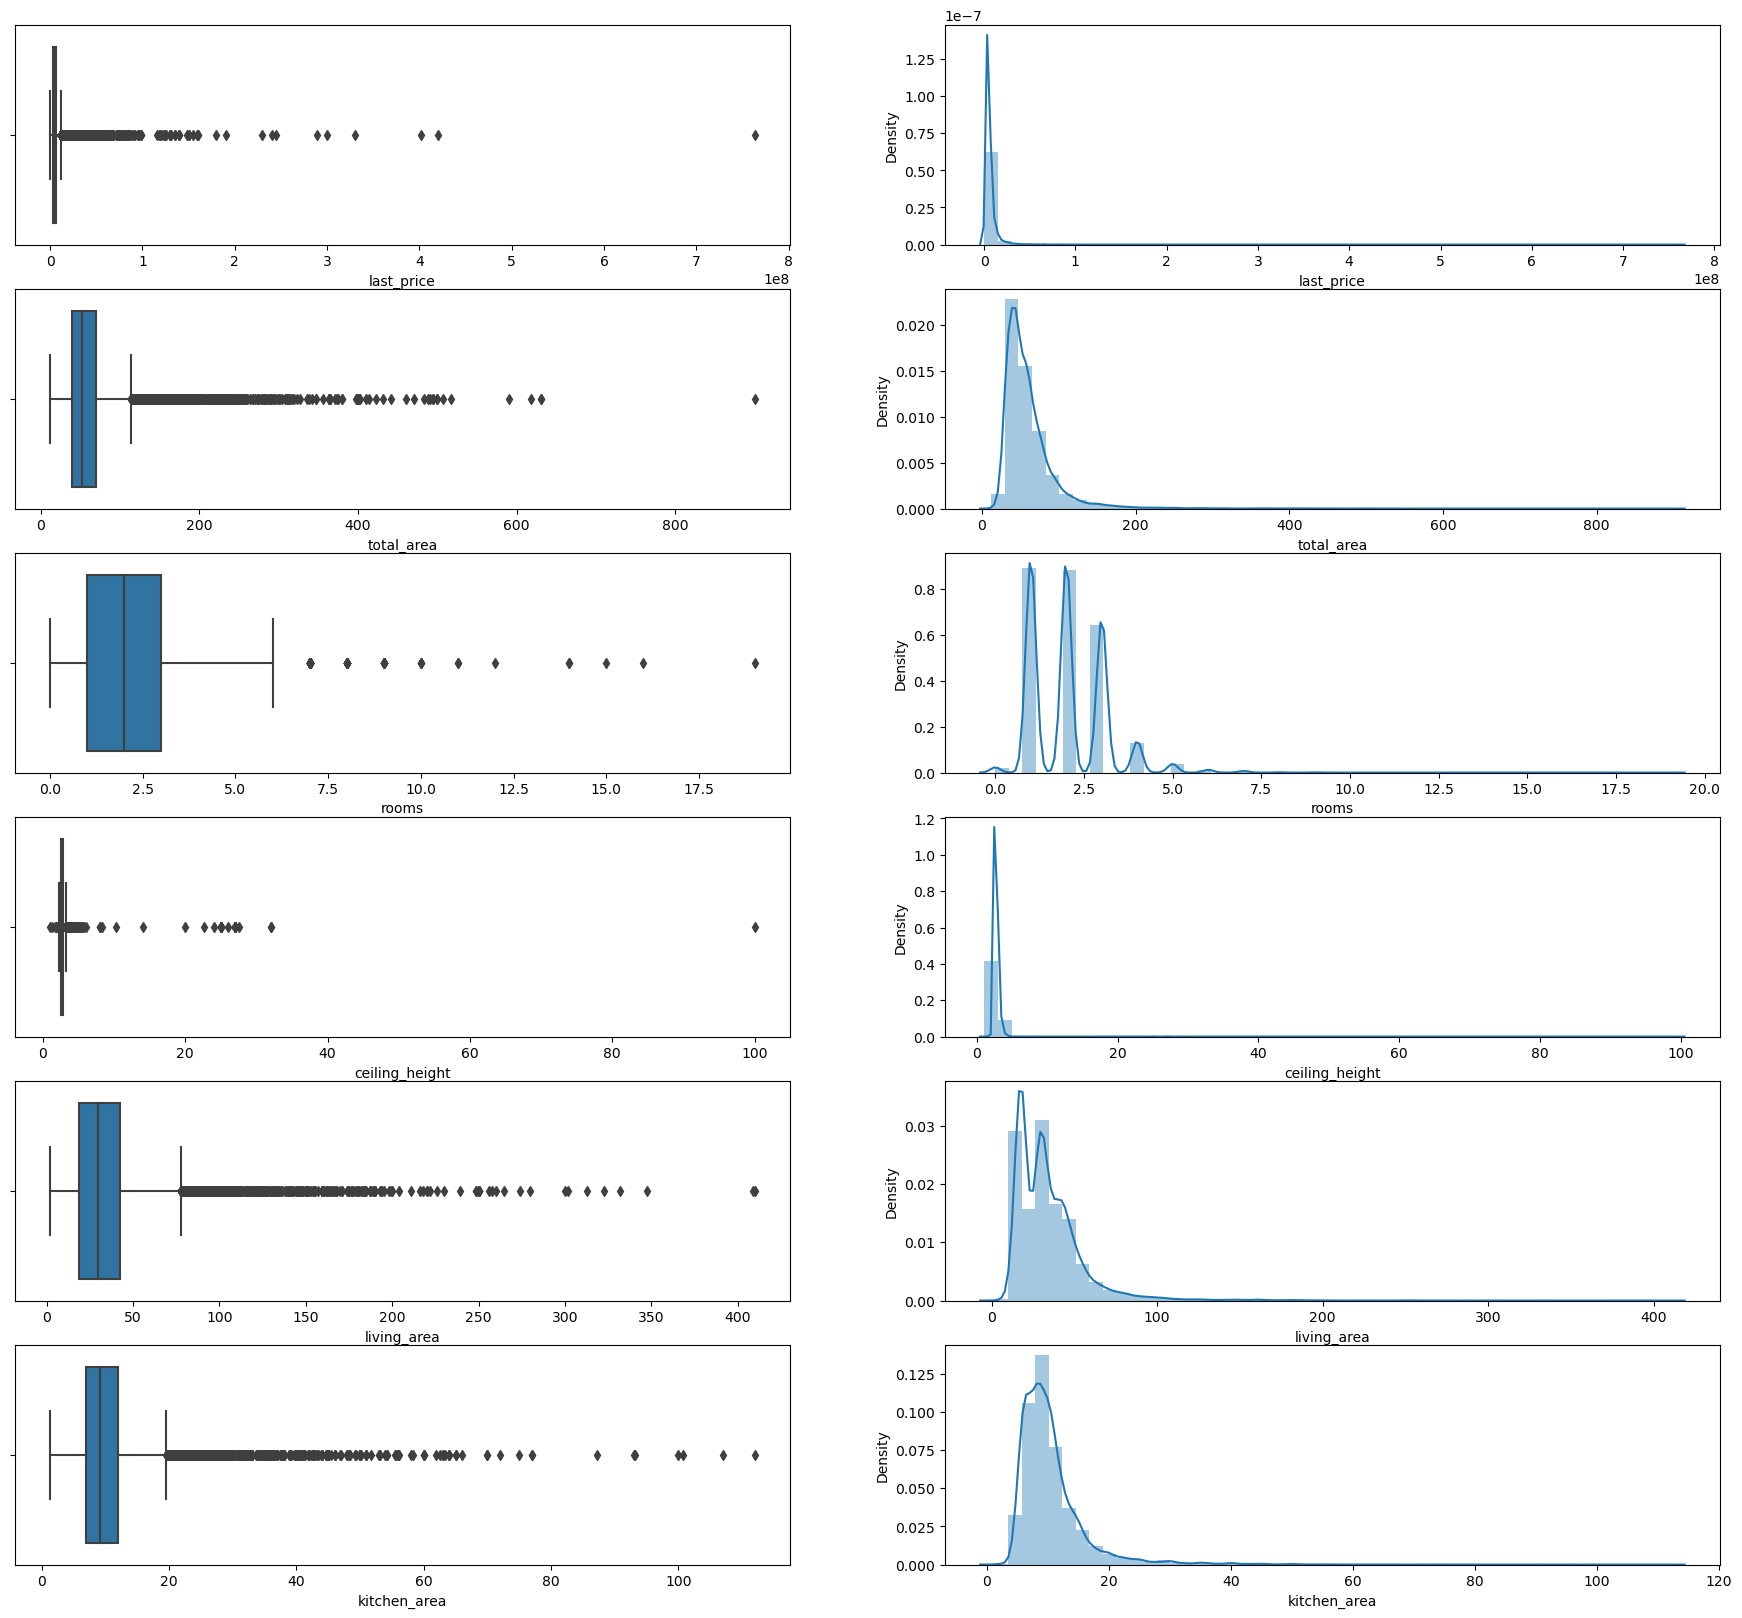

In [20]:
fig, ax = plt.subplots(6,2,  figsize = (22,20)) 
for index, col in enumerate(anomals_columns):
    plt.subplot(6,2, 2*index+1)
    ax = sns.boxplot(x = col, data = df)
    index = 2*(index+1)
    plt.subplot(6,2, index)
    ax = sns.distplot(df[col]);

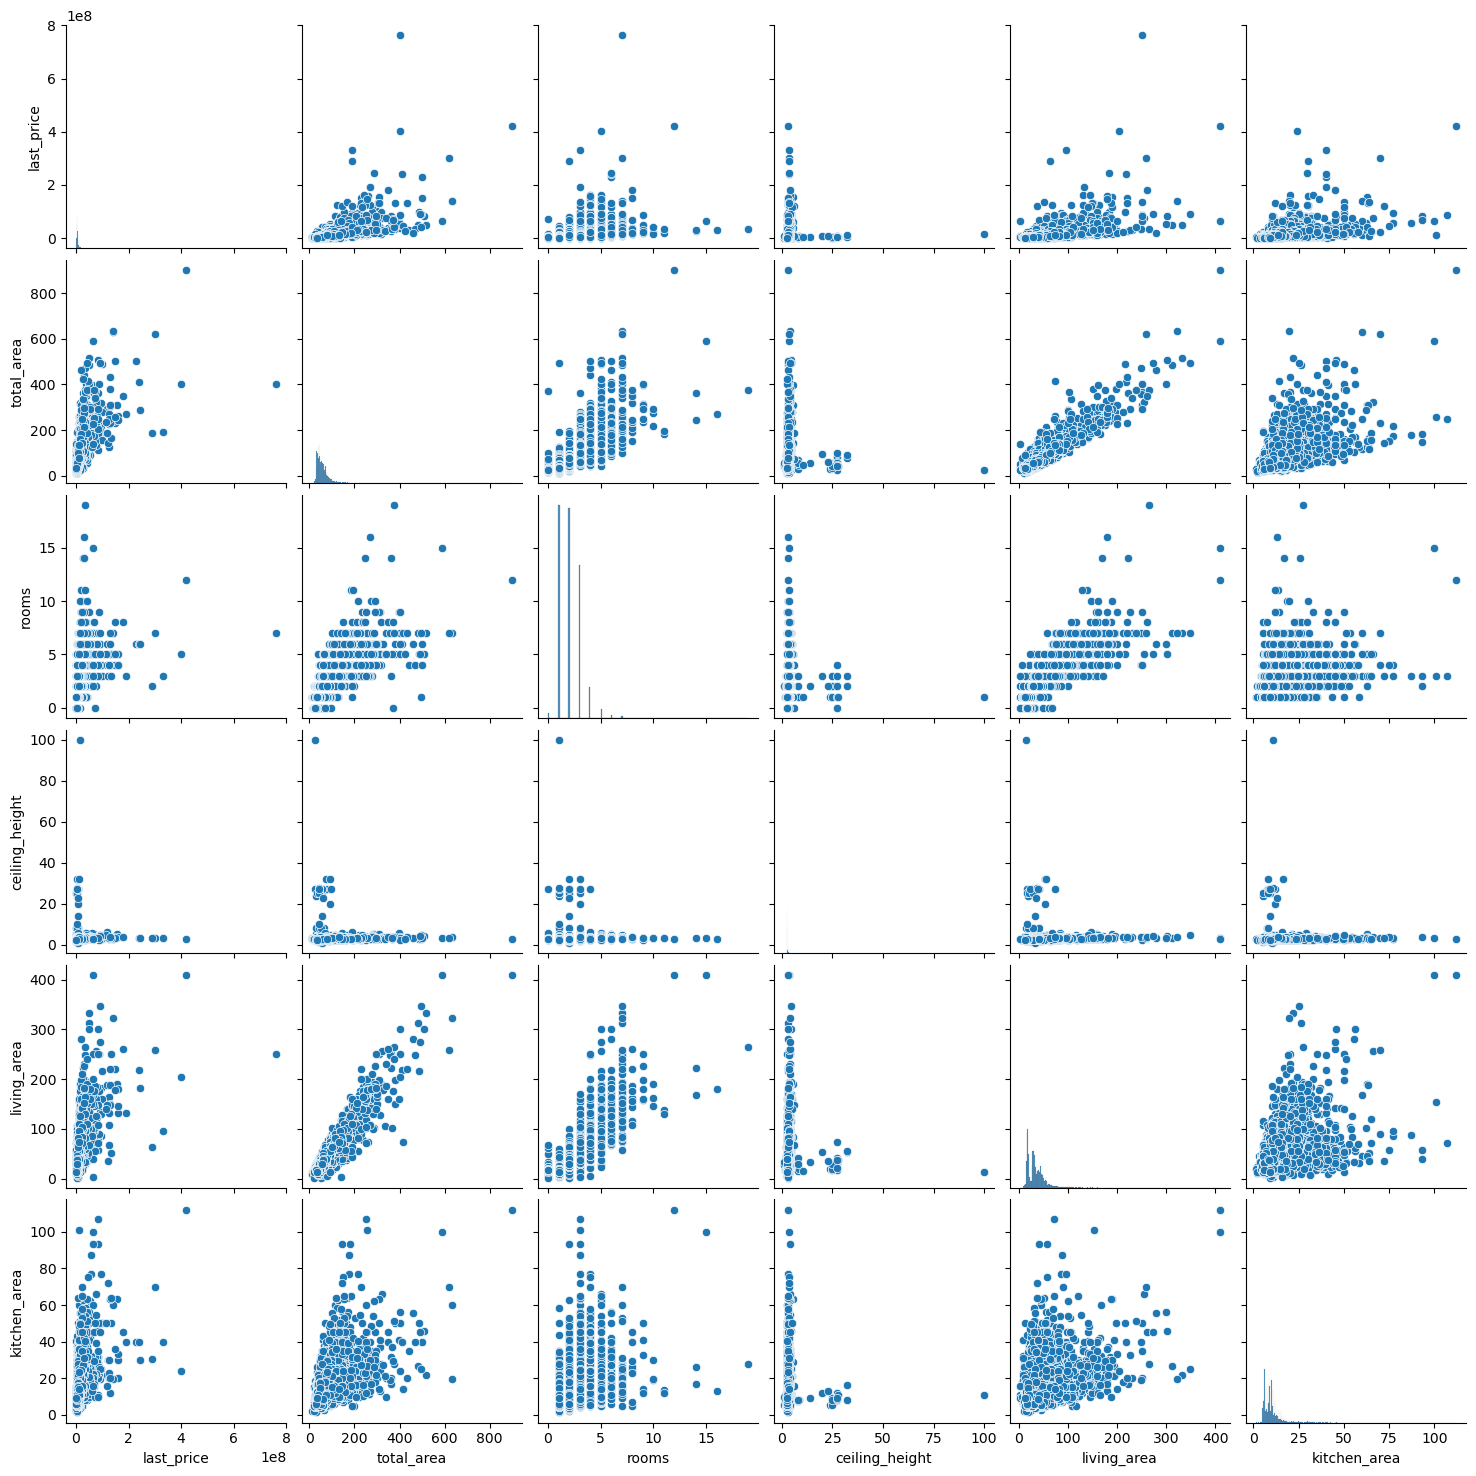

In [21]:
sns.pairplot(df[anomals_columns])

Видим линейную зависимость между признаками жилой и общей площади. Можем восстановить пропущенные значения при помощи линейной регрессии.

In [22]:
df_lin = df[['total_area','living_area']]

In [23]:
df_lin = df_lin.dropna(subset=['living_area'])

In [24]:
linearregression = LinearRegression()
result = linearregression.fit(df_lin['total_area'].values.reshape(-1, 1), y=df_lin['living_area'].values)
result.intercept_, result.coef_

(-1.4062979178067252, array([0.59707346]))

In [25]:
predicted = result.coef_[0]*df['total_area'] - result.intercept_

In [26]:
df.living_area.fillna(predicted, inplace=True)

Обработка признака airports_nearest

In [27]:
df.loc[df.airports_nearest == 0] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_home,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [28]:
index_del = df.loc[df.airports_nearest == 0].index 
df.drop(index = index_del, inplace = True) 

Удаляем строку, с квартирой находящейся в аэропорту

Обработка признака last_price

In [29]:
df.last_price.agg(['min', 'max']) 

min        12190.0
max    763000000.0
Name: last_price, dtype: float64

In [30]:
df.last_price.describe(percentiles=[0.01, 0.99]) 

count    2.356400e+04
mean     6.540039e+06
std      1.091117e+07
min      1.219000e+04
1%       1.000000e+06
50%      4.646000e+06
99%      3.600000e+07
max      7.630000e+08
Name: last_price, dtype: float64

In [31]:
df = df[df.last_price.between(df.last_price.quantile(.01), df.last_price.quantile(.99))]

Обработка признака total_area

In [32]:
df.total_area.describe(percentiles=[0.01, 0.99])

count    23104.000000
mean        58.818025
std         29.483887
min         12.000000
1%          25.300900
50%         52.000000
99%        170.000000
max        470.300000
Name: total_area, dtype: float64

In [33]:
df = df[df.total_area.between(df.total_area.quantile(.01), df.total_area.quantile(.99))]

Обработка признака rooms

In [34]:
df.rooms.describe(percentiles=[0.01, 0.99])

count    22645.000000
mean         2.031398
std          0.965275
min          0.000000
1%           1.000000
50%          2.000000
99%          5.000000
max          8.000000
Name: rooms, dtype: float64

In [35]:
df = df[df.rooms.between(df.rooms.quantile(.01), df.rooms.quantile(.99))]

Обработка признака ceiling_height

In [36]:
df.ceiling_height.describe(percentiles=[0.01, 0.99])

count    13902.000000
mean         2.751019
std          0.960362
min          1.000000
1%           2.500000
50%          2.650000
99%          3.700000
max         32.000000
Name: ceiling_height, dtype: float64

In [37]:
df.ceiling_height = df.ceiling_height.fillna(df.ceiling_height.median())

In [38]:
df = df[df.ceiling_height.between(df.ceiling_height.quantile(.01), df.ceiling_height.quantile(.99))] 

Обработка признака living_area

In [39]:
df.living_area.describe(percentiles=[0.01, 0.99]) 

count    22182.000000
mean        32.909631
std         15.662267
min          2.000000
1%          13.500000
50%         30.000000
99%         86.000000
max        140.000000
Name: living_area, dtype: float64

In [40]:
df = df[df.living_area.between(df.living_area.quantile(.01), df.living_area.quantile(.99))] 

Обработка признака kitchen_area

In [41]:
df.kitchen_area.describe(percentiles=[0.01, 0.99]) 

count    19979.000000
mean        10.118490
std          4.809112
min          1.300000
1%           5.000000
50%          9.000000
99%         30.000000
max         65.000000
Name: kitchen_area, dtype: float64

In [42]:
df.kitchen_area = df.kitchen_area.fillna(df.kitchen_area.median())

In [43]:
df = df[df.kitchen_area.between(df.kitchen_area.quantile(.01), df.kitchen_area.quantile(.99))] 

Обработка признака days_exposition

In [44]:
df.days_exposition.describe(percentiles=[0.01, 0.99]) 

count    18717.000000
mean       177.588235
std        216.268708
min          1.000000
1%           4.000000
50%         94.000000
99%       1054.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [45]:
df.days_exposition = df.days_exposition.fillna(df.days_exposition.median())

 Отфильтровали датасет, отсекая наибольшие отклонения (1-99 перцентиль), восстанавливая пропуски

Результат:
  - заменили название колонок на корректные
  - заменили пропущенные значения is_apartment на False
  - удалили строки с пропущенными значениями locality_name и floors_total
  - изменили тип данных first_day_exposition на datetime64 и is_apartment на bool
  - заменили пропущенные значения balcony на 0
  - заменили пропущенные значения living_area с помщью линейной регрессии по признаку total_area, т.к. была выявлена линейная зависимость
  - по признаку airports_nearest удалили строку со значением 0, т.к. квартира не может находиться в аэропорту
  - по признакам last_price, total_area, rooms, ceiling_height, living_area, kitchen_area отсекли аномальные значения ниже 1 и выше 99 перцентиля 
  - для ceiling_height, kitchen_area, days_exposition восстановили пропуски по медианному значению


# Исследовательский анализ

Считаем и добавляем таблицу новые признаки:
  - cost_m - стоимость квадратного метра
  - ratio_liv - соотношение жилой и общей площади
  - ratio_kitchen - соотношение площади кухни к общей
  - floor_var - этаж квартиры: первый, последний, другой
  - day, month, year - день недели, месяц и год публикации объявления

In [46]:
df['cost_m'] = np.where((df.last_price / df.total_area).ge(0), df.last_price / df.total_area, 0)

In [47]:
df['ratio_liv'] = np.where((df.living_area / df.total_area).ge(0), df.living_area / df.total_area, 0)

In [48]:
df['ratio_kitchen'] = np.where((df.kitchen_area / df.total_area).ge(0), df.kitchen_area / df.total_area, 0)

In [49]:
def f(row):
    if row['floor_home'] == 1:
        val = 'first'
    elif row['floor_home'] == row['floors_total']:
        val = 'last'
    else :
        val = 'other'
    return val


df['floor_var'] = df.apply (f, axis=1)

In [50]:
df['day'] = df['first_day_exposition'].dt.day
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [51]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor_home',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'cost_m', 'ratio_liv',
       'ratio_kitchen', 'floor_var', 'day', 'month', 'year'],
      dtype='object')

Создаем новый дф для анализа зависимости цены от площади, числа комнат, удалённости от центра:

In [52]:
df_copy = df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']] 

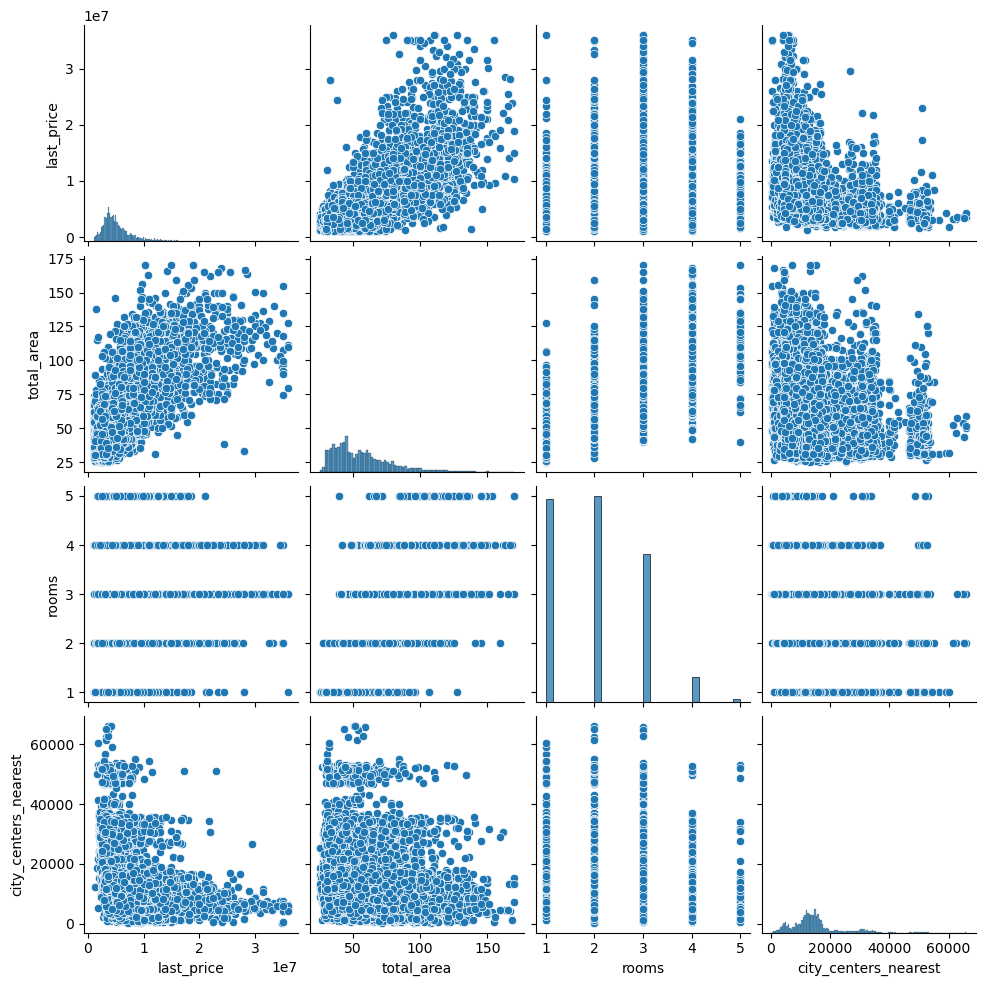

In [53]:
sns.pairplot(df_copy)

Вывод: чем ближе кв к аэропорту и больше площадь, тем цена выше

In [54]:
df_copy1 = df[['last_price', 'day', 'month', 'year', 'floor_var', 'first_day_exposition']]

<Axes: xlabel='floor_var'>

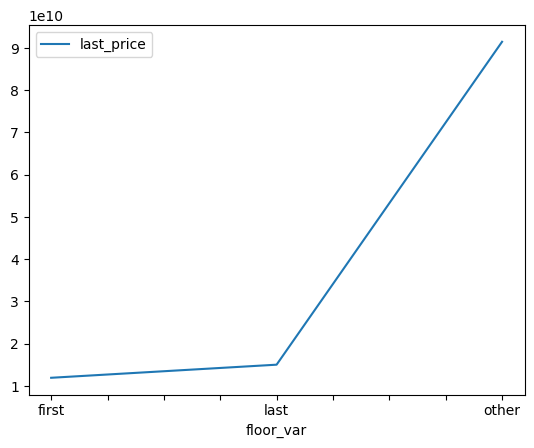

In [55]:
df_copy1 = df[[x for x in df.columns if 'last_price' in x] + ['floor_var']]
df_copy1.groupby('floor_var').sum().plot()

Изучаем зависимость цены от этажа. Видим, что цена выше, если квартира находится не на первом и последнем этаже

<Axes: xlabel='first_day_exposition'>

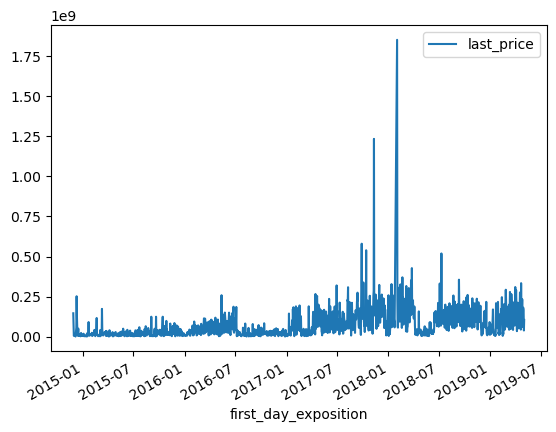

In [56]:
df_copy1 = df[[x for x in df.columns if 'last_price' in x] + ['first_day_exposition']]
df_copy1.groupby('first_day_exposition').sum().plot()


<Axes: xlabel='year'>

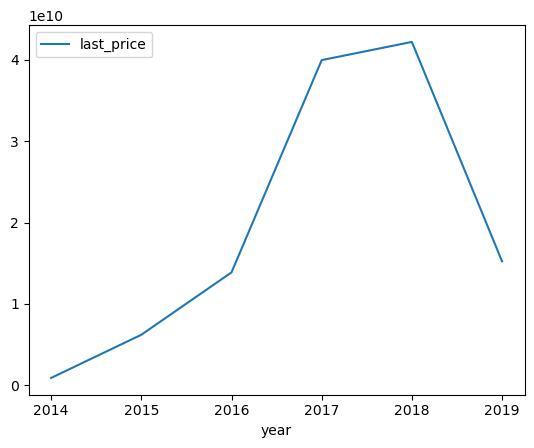

In [57]:
df_copy1 = df[[x for x in df.columns if 'last_price' in x] + ['year']]
df_copy1.groupby('year').sum().plot()

<Axes: xlabel='month'>

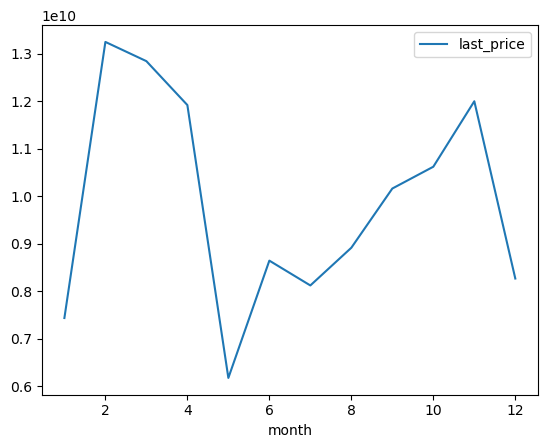

In [58]:
df_copy1 = df[[x for x in df.columns if 'last_price' in x] + ['month']]
df_copy1.groupby('month').sum().plot()

<Axes: xlabel='day'>

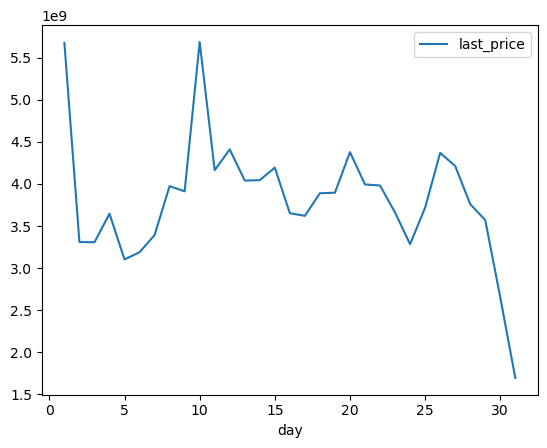

In [59]:
df_copy1 = df[[x for x in df.columns if 'last_price' in x] + ['day']]
df_copy1.groupby('day').sum().plot()

Наиболее дорогие квартиры были опубликованы в конце 2017, начале 2018 гг, пик цен по месяцам: февраль-апрель, ноябрь.
  Как правило, более дорогие квартиры публикуются в начале месяца

Посчитаем значения длительности продаж:

In [60]:
df['days_exposition'].median()

94.0

In [61]:
df['days_exposition'].mean() 

166.8260019550342

C:\Temp\ipykernel_20332\3745373424.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(df['days_exposition'])


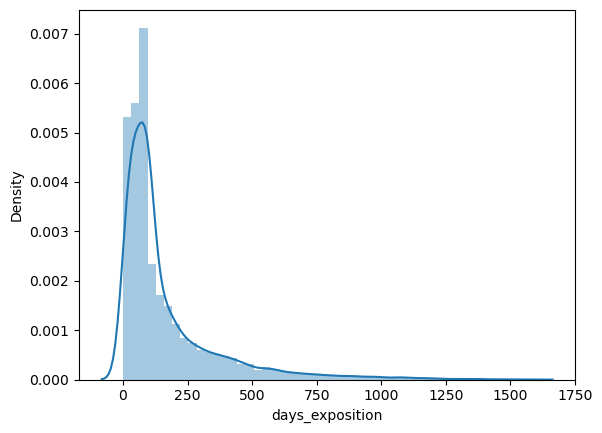

In [62]:
sns_plot = sns.distplot(df['days_exposition']) 
fig = sns_plot.get_figure()

В среднем, квартира продается за 167 дней, 50% квартир было продано за 94 дней

 Посчитаем количество квартир по населенным пунктам:

In [63]:
df.city = df['locality_name'].value_counts().reset_index(name='Amount')


C:\Temp\ipykernel_20332\1860594786.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.city = df['locality_name'].value_counts().reset_index(name='Amount')


In [64]:
df.city.head(10)

,index,Amount
0,Санкт-Петербург,14215
1,посёлок Мурино,462
2,посёлок Шушары,417
3,Всеволожск,380
4,Пушкин,343
5,Колпино,333
6,посёлок Парголово,305
7,Гатчина,297
8,деревня Кудрово,268
9,Выборг,215


In [65]:
city_df = df['locality_name'].value_counts().head(10)

In [66]:
city_cost_m = df.query('locality_name in (@city_df.index)') \
    .pivot_table(values='cost_m', index='locality_name') \
    .sort_values('cost_m', ascending=False)

In [67]:
city_cost_m

,cost_m
locality_name,
Санкт-Петербург,109869.912231
Пушкин,102483.391943
деревня Кудрово,92168.266805
посёлок Парголово,90036.615296
посёлок Мурино,84424.929207
посёлок Шушары,77518.696894
Колпино,75227.442666
Гатчина,69091.187275
Всеволожск,68654.334453


In [68]:
city_cost_m = city_cost_m.astype(int)

In [69]:
city_cost_m.mean() 

cost_m    82779.7
dtype: float64

Видим среднюю цену за квадратный метр в топ 10 населенных пунктах с наибольшим числом объявлений: 82779.7 рублей за квадратный метр


In [70]:
df['city_centers_nearest_km'] = df['city_centers_nearest']/1000


In [71]:
df.city_centers_nearest_km

0        16.028
1        18.603
2        13.933
5           NaN
7        11.634
          ...  
23692       NaN
23693    34.104
23695       NaN
23696       NaN
23697    10.364
Name: city_centers_nearest_km, Length: 21483, dtype: float64

In [72]:
df['city_centers_nearest_km'] = df['city_centers_nearest_km'].fillna(999999)
df['city_centers_nearest_km'] = df['city_centers_nearest_km'].astype('int')

In [73]:
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km <15') \
    .pivot_table(index = 'city_centers_nearest_km', values = 'cost_m', aggfunc = 'mean')


In [74]:
pivot_table_km

,cost_m
city_centers_nearest_km,
0,131424.354513
1,138380.483548
2,121029.500005
3,117321.581561
4,132990.179961
5,134028.321110
6,134946.674239
7,129171.351014
8,117332.709881


<Axes: xlabel='city_centers_nearest_km'>

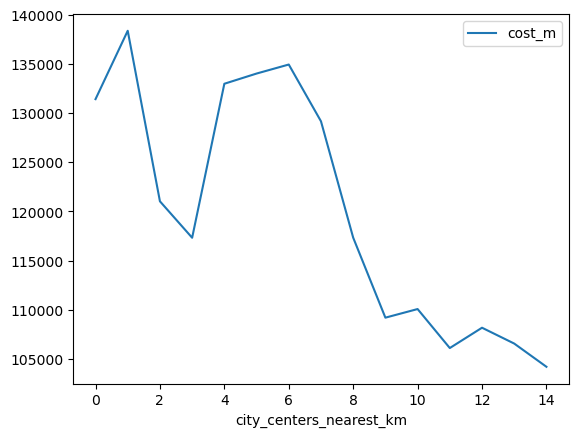

In [75]:
pivot_table_km.plot()

Определили радиус центра - 8км

In [76]:
df.corr()['last_price'].sort_values()

C:\Temp\ipykernel_20332\3708979992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['last_price'].sort_values()


city_centers_nearest_km   -0.367224
city_centers_nearest      -0.331296
ratio_kitchen             -0.180793
ponds_nearest             -0.096430
airports_nearest          -0.032865
year                      -0.015848
studio                    -0.013518
open_plan                 -0.000282
day                        0.004484
month                      0.006530
ratio_liv                  0.007548
is_apartment               0.022836
balcony                    0.052484
parks_nearest              0.054233
days_exposition            0.073666
floor_home                 0.097162
floors_total               0.121633
total_images               0.142830
parks_around3000           0.169432
ponds_around3000           0.187927
ceiling_height             0.397727
rooms                      0.428422
kitchen_area               0.522517
living_area                0.621467
cost_m                     0.724654
total_area                 0.735967
last_price                 1.000000
Name: last_price, dtype: flo

Вывод

Средняя квартира, выставленная на продажу, имеет следующий вид: 
  - 2-комнатная квартира 
  - площадь 56 кв.м 
  - высота потолков 2,67 м
  - этаж - 6
  - жилая площадь 32.4 кв.м.
  - площадь кухни 9.8 кв.м.
  - стоимотсть квадратного метра 96236 рублей
  - срок продажи 167 дней
  - цена 5.5 млн рублей

Как правило, продажа недвижимости занимала 5.5 месяцев. При этом половина всех объектов недвижимости была продана в течении 94 дней с момента публикации.

Факторы, влияющие на стоимость квартиры:

Наибольшее влияние на стоимость квартиры оказывает общая площадь (коэфф. корреляции 0,74).
Удаленность от центра имеет обратную зависимость и причем более слабую, чем ожидалось (-0,37).
Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.
Наиболее дорогие квартиры были опубликованы в 2017, начале 2018 гг. Как правило, более дорогие квартиры публикуются в весной и осень, в начале месяца

Лидером по количеству представленных квартир и стоимости квадратного метра является Санкт-Петербург.
Самый дешевый кв.м. из топ 10 населенных пунктов в Выборге и Всеволожске.
